1. VIẾT CHƯƠNG TRÌNH BIẾN ĐỔI ẢNH <br>
1.1 Chọn đối tượng trong ảnh

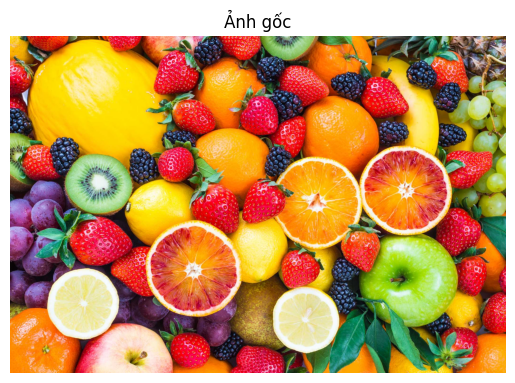

Kích thước ảnh gốc: (1427, 2100, 3)


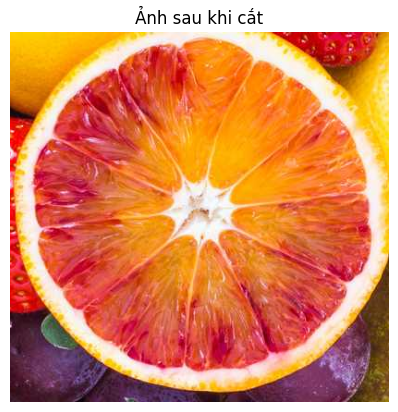

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')

plt.imshow(data)
plt.title("Ảnh gốc")
plt.axis('off')
plt.show()

bmg = data[800:1200, 570:980]
print("Kích thước ảnh gốc:", data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.title("Ảnh sau khi cắt")
plt.axis('off')
plt.show()


1.2 Tịnh tiến đơn

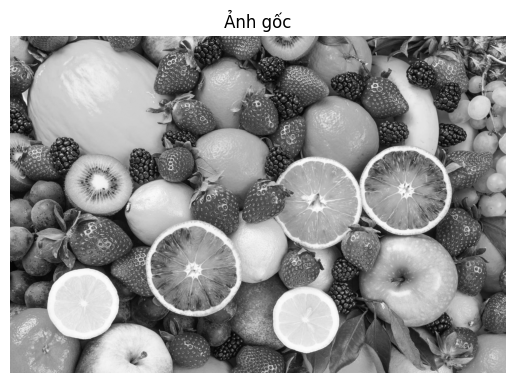

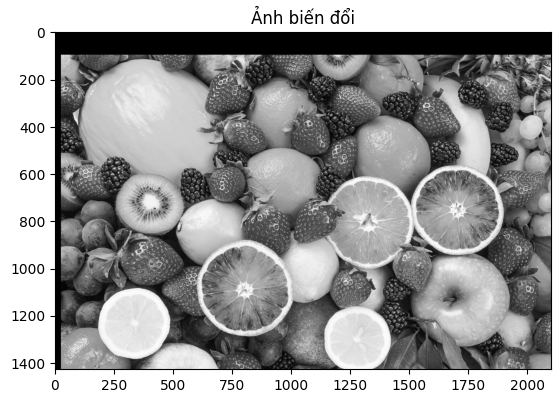

In [14]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg', mode='F')
plt.imshow(data, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')
plt.show()

bdata = nd.shift(data, (100,25))

plt.imshow(bdata, cmap='gray')
plt.title('Ảnh biến đổi')
plt.show()

1.3 Thay đổi kích thước ảnh


In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh gốc
data = iio.imread('fruit.jpg')
plt.imshow(data)
plt.title("Ảnh gốc")
plt.axis('off')
plt.show()

# In kích thước ảnh gốc
print("Kích thước ảnh gốc:", data.shape)

# ⚠️ KHÔNG dùng nd.zoom(data, 2) vì sẽ phóng cả chiều màu → sai
# Thay bằng zoom theo từng chiều cụ thể:
# Phóng ảnh gấp 2 lần theo chiều cao và rộng, giữ nguyên số kênh màu
bdata = nd.zoom(data, (2, 2, 1))
print("Kích thước ảnh phóng to:", bdata.shape)

# Thu nhỏ ảnh: 50% chiều cao, 90% chiều rộng, giữ nguyên kênh màu
data3 = nd.zoom(data, (0.5, 0.9, 1))
print("Kích thước ảnh thu nhỏ:", data3.shape)

# Hiển thị ảnh sau khi thu nhỏ
plt.imshow(data3.astype(np.uint8))  # Đảm bảo đúng kiểu dữ liệu
plt.title("Ảnh sau khi thu nhỏ")
plt.axis('off')
plt.show()


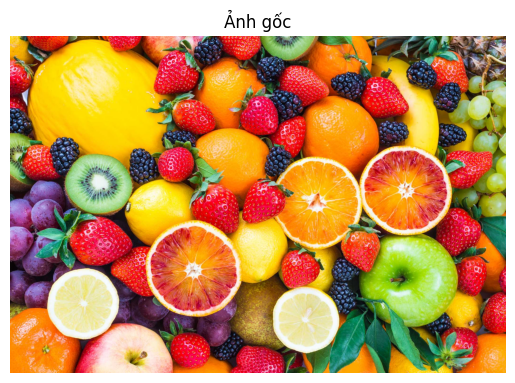

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


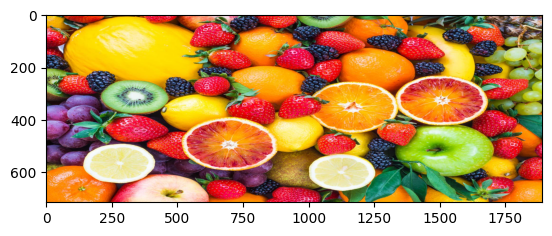

In [22]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
plt.imshow(data)
plt.title("Ảnh gốc")
plt.axis('off')
plt.show()
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2,2,1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()

1.4 Xoay ảnh

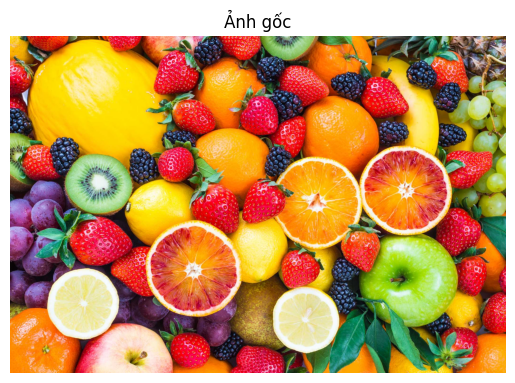

(1427, 2100, 3)


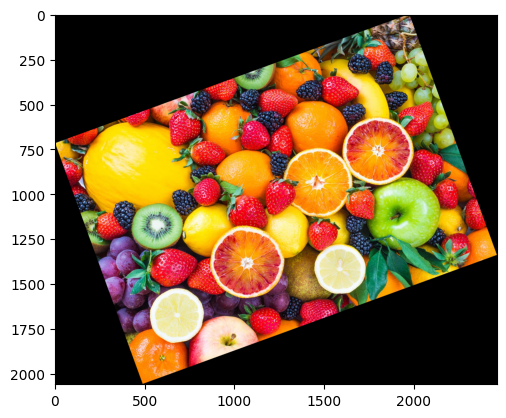

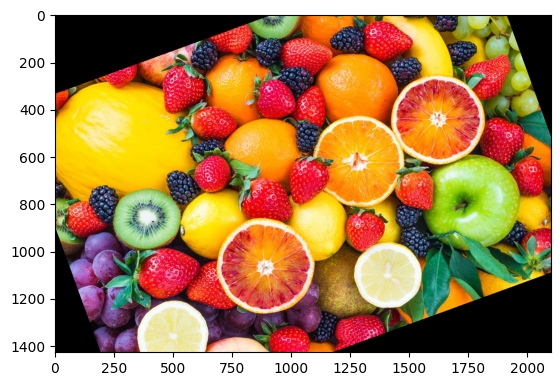

In [21]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
plt.imshow(data)
plt.title("Ảnh gốc")
plt.axis('off')
plt.show()
print(data.shape)

dl = nd.rotate(data, 20)
plt.imshow(dl)
plt.show()

d2 = nd.rotate(data, 20, reshape = False)
plt.imshow(d2)
plt.show()

1.5 Dilation và Erosion

(309, 515)


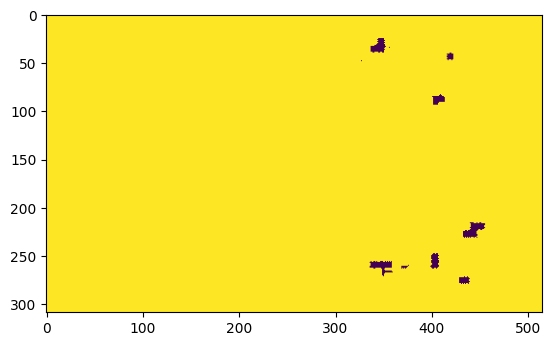

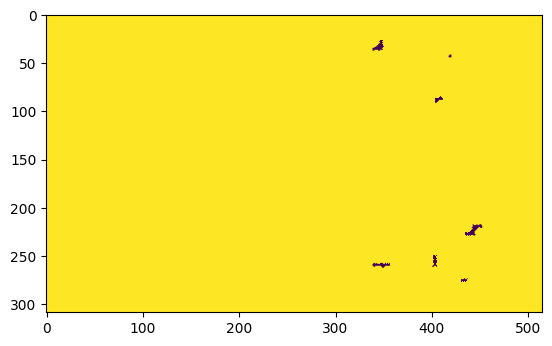

In [26]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode = 'F')
print(data.shape)

dl = nd.binary_dilation(data)
plt.imshow(dl)
plt.show()

d2 = nd.binary_dilation(data, iterations = 3)
plt.imshow(d2)
plt.show()

1.6 Coordinate Mapping

(309, 515)


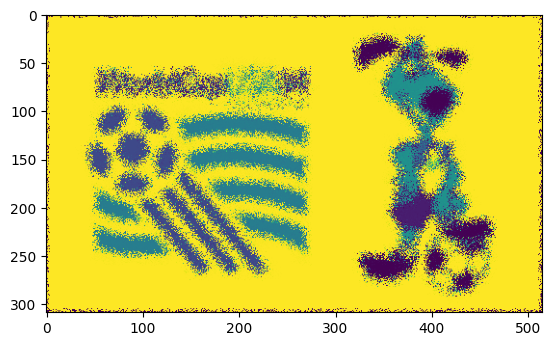

In [28]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode = 'F')
print(data.shape)
V, H = data.shape

M = np.indices((V,H))

d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M+q).astype(int)
dl = nd.map_coordinates(data, mp)
plt.imshow(dl)
plt.show()

1.7 Biến đổi chung (Generic Transformation)

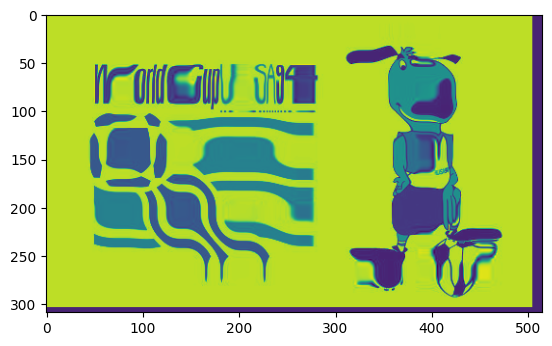

In [29]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

def GeoFun(outcoord):
    a = 10*np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10*np.cos(outcoord[1]/10.0) + outcoord[1]
    return a,b

data = iio.imread('world_cup.jpg', mode='F')

dl = nd.geometric_transform(data, GeoFun)
plt.imshow(dl)
plt.show()